In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows' , 60)

In [ ]:
df = pd.read_csv('municipality_bus_utilization.csv')
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df.shape

In [ ]:
df['free_to_use'] = df['total_capacity'] - df['usage']
df

In [ ]:
(df['free_to_use'] <= 0).sum()

In [ ]:
(df['free_to_use'] < 0 ).sum()

In [ ]:
df[df['free_to_use'] < 0 ]

In [ ]:
df['free_to_use'].min()

In [ ]:
df[df['free_to_use'] < 0 ]['municipality_id'].value_counts() # All wrong data in same municipality. Or maybe municipality's total_capacity may be wrong. 
                                                             # Maybe everything is right, the municipality needs a bigger capacity

In [ ]:
df.info()

In [ ]:
df = df.sort_values('timestamp' , ascending=True)
df

In [ ]:
df['timestamp'].value_counts(dropna=False) # There may be 2 misspelled data

In [ ]:
df[df['timestamp'] == '2017-06-16 14:27:13']

In [ ]:
df[df['timestamp'] == '2017-06-16 14:34:14']

In [ ]:
df[df['timestamp'] == '2017-08-11 08:19:39']

In [ ]:
df[df['timestamp'] == '2017-08-11 08:25:43']

In [ ]:
# df[df['timestamp'] == '2017-06-16 14:27:13']['timestamp'] = '2017-06-16 14:34:14'

In [ ]:
df.loc[df['timestamp'] == '2017-06-16 14:27:13', 'timestamp'] = '2017-06-16 14:34:14'
df.loc[df['timestamp'] == '2017-08-11 08:19:39', 'timestamp'] = '2017-08-11 08:25:43' # Yes, it was a typo and it has been corrected.

In [ ]:
df['timestamp'].value_counts(dropna=False)

In [ ]:
df['municipality_id'].value_counts(dropna=False)

In [ ]:
df['total_capacity'].value_counts(dropna=False)

In [ ]:
df['usage'].value_counts(dropna=False)

In [ ]:
df['timestamp'] = df['timestamp'].astype('datetime64')

In [ ]:
df.info()

In [ ]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].minute == 0 :
#         print(i)


# # Indexes with timestamps at 0 minutes 
# # 3400 to 12659

In [ ]:
df.iloc[3400,:]

In [ ]:
df.iloc[12659,:]

In [ ]:
df.iloc[13039,:]

In [ ]:
# for i in range(df.shape[0]):
#     if df['timestamp'][i].hour == 7 :
#         print(i)

In [ ]:
df['timestamp'][0]

In [ ]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [ ]:
df['hour'].value_counts(sort=True)

In [ ]:
df['timestamp'] = df['timestamp'] + pd.Timedelta(minutes=5 , seconds=10) 
# By adding 5 minutes and 10 seconds, I included the border measurements in the next hours. In this way, I achieved a more uniform distribution.

In [ ]:
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['min'] = df['timestamp'].apply(lambda x : x.minute)

In [ ]:
df['hour'].value_counts() # Almost perfect now 

In [ ]:
df

In [ ]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].sum().plot();

In [ ]:
for x in [6,7,8]:
    for y in range(1,31):
        if df[(df['month'] == x) & (df['day'] == y)]['usage'].sum() <= 0 :
            print(f'{x}.Month {y}.day nan') # We have 4 nan days. ### 6-20 , 6-21 , 8-3 , 8-4

In [ ]:
df[(df['month'] == 6) & (df['day'] == 1)]['usage'].sum() # One of the nan days

In [ ]:
df[(df['month'] == 6) & (df['day'] == 30)]['usage'].sum() # The day have max usages.

In [ ]:
df[(df['month'] == 6) & (df['day'] == 30)] # 340 data ??? It should have been 170 or 180

In [ ]:
df.groupby(['month','day']).count() # We have 72 days at total.(4 of them nan)

In [ ]:
df.groupby(['month','day']).count()['timestamp'].unique() # All of them should have been 180 or 170. Date with 340 data probably doubled

In [ ]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 180]

In [ ]:
df[(df['month'] == 6) & (df['day'] == 4)].head(50) # An example of the day with 180 data

In [ ]:
df[(df['month'] == 6) & (df['day'] == 28)].head(50) # An example of the day with 170 data

In [ ]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 170]

In [ ]:
df.groupby(['month','day']).count()[df.groupby(['month','day']).count()['timestamp'] == 340] # But the reason why it is 340 instead of 170 should be investigated
                                                                                             # Bus services may have been doubled as it coincided with the middle of summer.
                                                                                             # But still, it is wrong to keep records 2 times in a row. We have to drop one of these 2 data

In [ ]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # It seems clear that 2 measurements were made on the 30th day of June, with an interval of less than 1 minute in a row.

In [ ]:
plt.figure(figsize=(12,6))

df.groupby(["month","day"])["usage"].mean().plot();

In [ ]:
df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()

In [ ]:
drop_stamptimes = df[(df['month'] == 6) & (df['day'] == 30)]['timestamp'].unique()[[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]]
drop_stamptimes

In [ ]:
drop_indexes = df[df['timestamp'].isin(drop_stamptimes)].index
drop_indexes

In [ ]:
df.drop(drop_indexes , axis = 0 , inplace = True)

In [ ]:
df.reset_index(drop=True)

In [ ]:
df.groupby(['month','day']).count()['timestamp'].unique()

In [ ]:
df['hour'].value_counts() # Still perfect, nice !

In [ ]:
plt.figure(figsize=(12,6))

df.groupby(["month","day",'hour'])["usage"].sum().plot();

In [ ]:
df.groupby(["month","day",'hour'])["usage"].sum().describe()

In [ ]:
nan_hours_counter = 0
risky_hours_counter = 0

for month in range(6,9):
        for day in range(1,31):
            if ((month == 6) & (day < 4)) | ((month == 8) & (day > 19)) : 
                pass
            else:
                for hour in range(8,17):
                    total_usage = df[(df['month'] == month) & (df['day'] == day) & (df['hour'] == hour)]['usage'].sum()
                    if total_usage == 0 :
                        print(f'Warning ! {month}.month {day}.day and {hour}.hour has 0 total usage and nan hour !!!')
                        nan_hours_counter += 1
                    elif (total_usage > 24000) | (total_usage < 5000) :
                        print(f'{month}.month {day}.day and {hour}.hour has {total_usage} total usage be careful') # Anormal day and hours.
                        risky_hours_counter += 1

print(f"Total nan hours : {nan_hours_counter}")
print(f"Total risky hours : {risky_hours_counter}")

# Total 4 day nan.
# Total 36 hours nan(4x9 hours per day.)

In [ ]:
df[(df['month'] == 6) & (df['day'] == 1) & (df['hour'] == 8)]['usage'].sum() # One of the nan hours.

In [ ]:
df[(df['month'] == 6) & (df['day'] == 27) & (df['hour'] == 14)]['usage'].sum() # One of the most usage hours

In [ ]:
df[(df['month'] == 7) & (df['day'] == 25) & (df['hour'] == 8)]['usage'].sum() # One of the less usage hours

In [ ]:
df[(df['month'] == 6) & (df['day'] == 30)].head(30) # 30.th june normal now.

# Interpolation (Filling nan hours)

In [ ]:
# 6.Month 20-21 , 8.Month 3-4

 # OR

# 6.Month 20-21 , 7.Month 31 , 8.Month 3-4

In [ ]:
# Municipality_id and Total capacities
# 9 --> 1332
# 8 --> 2947
# 7 --> 2019
# 6 --> 3113
# 5 --> 587
# 4 --> 3893
# 3 --> 1930
# 2 --> 697
# 1 --> 397
# 0 --> 2813

In [ ]:
df.set_index('timestamp' , drop=True , inplace=True)

In [ ]:
df

In [ ]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

In [ ]:
# Define the specific dates to include
specific_dates = ['2017-06-20','2017-06-21',
                  '2017-08-03','2017-08-04']

# Create a list to store the dataframes
df_list = []

# Loop through the specific dates
for date in specific_dates:
    # Create timestamp range for each day
    timestamp_range = pd.date_range(date + ' 08:00:00', date + ' 16:30:00', freq='30T')

    # Get the unique municipality ids for that date
    municipality_ids = df['municipality_id'].unique()
    
    # Loop through the municipality_ids
    for municipality_id in municipality_ids:
        # Create a new dataframe for each municipality_id
        df_temp = pd.DataFrame(index=timestamp_range)
        df_temp['municipality_id'] = municipality_id
        df_temp = df_temp.join(df.loc[(df['municipality_id'] == municipality_id) & (df.index.date == date), 'usage'])
        # Append the dataframe to the list
        df_list.append(df_temp)

# Concatenate the dataframes together
result_df = pd.concat(df_list)

result_df = result_df.sort_index()

In [ ]:
result_df

In [ ]:
df = pd.concat([df,result_df],ignore_index=False).sort_index()
df

In [ ]:
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='ffill'))
# df['total_capacity'] = df.groupby("municipality_id")['total_capacity'].apply(lambda x: x.fillna(method='bfill'))

In [ ]:
df['total_capacity'] = df.replace({'municipality_id': {9: 1332, 8: 2947, 7: 2019, 6: 3113, 5: 587, 4: 3893, 3: 1930, 2: 687, 1: 397, 0: 2813}})['municipality_id']

In [ ]:
df

In [ ]:
df[df['municipality_id'] == 9]['total_capacity'].unique()

In [ ]:
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['min'] = df.index.minute

In [ ]:
df

In [ ]:
df.drop('free_to_use' , axis = 1 , inplace = True)

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
df_0 = df[df['municipality_id'] == 0][['usage']]
df_1 = df[df['municipality_id'] == 1][['usage']]
df_2 = df[df['municipality_id'] == 2][['usage']]
df_3 = df[df['municipality_id'] == 3][['usage']]
df_4 = df[df['municipality_id'] == 4][['usage']]
df_5 = df[df['municipality_id'] == 5][['usage']]
df_6 = df[df['municipality_id'] == 6][['usage']]
df_7 = df[df['municipality_id'] == 7][['usage']]
df_8 = df[df['municipality_id'] == 8][['usage']]
df_9 = df[df['municipality_id'] == 9][['usage']]

In [ ]:
df_0.shape

In [ ]:
df_0

In [ ]:
df_0.isna().sum() 

In [ ]:
df_0.index = df_0.index.floor('H')  # df_0.index = pd.to_datetime(df_0.index, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
df_0 = (df_0.groupby(df_0.index).max()).replace(0,np.nan) # df_0 = df_0.resample('H').max()

df_1.index = df_1.index.floor('H') 
df_1 = (df_1.groupby(df_1.index).max()).replace(0,np.nan)

df_2.index = df_2.index.floor('H') 
df_2 = (df_2.groupby(df_2.index).max()).replace(0,np.nan)

df_3.index = df_3.index.floor('H') 
df_3 = (df_3.groupby(df_3.index).max()).replace(0,np.nan)

df_4.index = df_4.index.floor('H') 
df_4 = (df_4.groupby(df_4.index).max()).replace(0,np.nan)

df_5.index = df_5.index.floor('H') 
df_5 = (df_5.groupby(df_5.index).max()).replace(0,np.nan)

df_6.index = df_6.index.floor('H') 
df_6 = (df_6.groupby(df_6.index).max()).replace(0,np.nan)

df_7.index = df_7.index.floor('H') 
df_7 = (df_7.groupby(df_7.index).max()).replace(0,np.nan)

df_8.index = df_8.index.floor('H') 
df_8 = (df_8.groupby(df_8.index).max()).replace(0,np.nan)

df_9.index = df_9.index.floor('H') 
df_9 = (df_9.groupby(df_9.index).max()).replace(0,np.nan)

In [ ]:
# df_0.index = df_0.index.floor('H')  # df_0.index = pd.to_datetime(df_0.index, format='%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H')
# df_0 = (df_0.groupby(df_0.index).mean()).replace(0,np.nan) # df_0 = df_0.resample('H').mean()

# df_1.index = df_1.index.floor('H') 
# df_1 = (df_1.groupby(df_1.index).mean()).replace(0,np.nan)

# df_2.index = df_2.index.floor('H') 
# df_2 = (df_2.groupby(df_2.index).mean()).replace(0,np.nan)

# df_3.index = df_3.index.floor('H') 
# df_3 = (df_3.groupby(df_3.index).mean()).replace(0,np.nan)

# df_4.index = df_4.index.floor('H') 
# df_4 = (df_4.groupby(df_4.index).mean()).replace(0,np.nan)

# df_5.index = df_5.index.floor('H') 
# df_5 = (df_5.groupby(df_5.index).mean()).replace(0,np.nan)

# df_6.index = df_6.index.floor('H') 
# df_6 = (df_6.groupby(df_6.index).mean()).replace(0,np.nan)

# df_7.index = df_7.index.floor('H') 
# df_7 = (df_7.groupby(df_7.index).mean()).replace(0,np.nan)

# df_8.index = df_8.index.floor('H') 
# df_8 = (df_8.groupby(df_8.index).mean()).replace(0,np.nan)

# df_9.index = df_9.index.floor('H') 
# df_9 = (df_9.groupby(df_9.index).mean()).replace(0,np.nan)

In [ ]:
df_0 # 684 rows means 76 days and 9 hours per day so 76x9 = 684

In [ ]:
df_0.isna().sum()

In [ ]:
# df_0 = df_0.resample('H').max()

In [ ]:
df_0 = df_0.interpolate(method='linear' , axis=0, inplace=False)
df_1 = df_1.interpolate(method='linear' , axis=0, inplace=False)
df_2 = df_2.interpolate(method='linear' , axis=0, inplace=False)
df_3 = df_3.interpolate(method='linear' , axis=0, inplace=False)
df_4 = df_4.interpolate(method='linear' , axis=0, inplace=False)
df_5 = df_5.interpolate(method='linear' , axis=0, inplace=False)
df_6 = df_6.interpolate(method='linear' , axis=0, inplace=False)
df_7 = df_7.interpolate(method='linear' , axis=0, inplace=False)
df_8 = df_8.interpolate(method='linear' , axis=0, inplace=False)
df_9 = df_9.interpolate(method='linear' , axis=0, inplace=False)

# Interpolate doesn't work well. To get a more accurate result, a more sensible filling process can be considered.

In [ ]:
df_0.isna().sum()

In [ ]:
start_date = pd.to_datetime('2017-06-21')
end_date = pd.to_datetime('2017-06-21 23:59:59')

df_0.loc[(df_0.index >= start_date) & (df_0.index <= end_date)] # df.between_time(start_date, end_date)

In [ ]:
df_0

In [ ]:
df_0_test = df_0[-126:]
df_1_test = df_1[-126:]
df_2_test = df_2[-126:]
df_3_test = df_3[-126:]
df_4_test = df_4[-126:]
df_5_test = df_5[-126:]
df_6_test = df_6[-126:]
df_7_test = df_7[-126:]
df_8_test = df_8[-126:]
df_9_test = df_9[-126:]

In [ ]:
df_0_test

In [ ]:
df_0_test_2w = df_0_test[-63:]
df_1_test_2w = df_1_test[-63:]
df_2_test_2w = df_2_test[-63:]
df_3_test_2w = df_3_test[-63:]
df_4_test_2w = df_4_test[-63:]
df_5_test_2w = df_5_test[-63:]
df_6_test_2w = df_6_test[-63:]
df_7_test_2w = df_7_test[-63:]
df_8_test_2w = df_8_test[-63:]
df_9_test_2w = df_9_test[-63:]

In [ ]:
df_0_test_2w

In [ ]:
df_0_test_1w = df_0_test[:-63]
df_1_test_1w = df_1_test[:-63]
df_2_test_1w = df_2_test[:-63]
df_3_test_1w = df_3_test[:-63]
df_4_test_1w = df_4_test[:-63]
df_5_test_1w = df_5_test[:-63]
df_6_test_1w = df_6_test[:-63]
df_7_test_1w = df_7_test[:-63]
df_8_test_1w = df_8_test[:-63]
df_9_test_1w = df_9_test[:-63]

In [ ]:
df_0_test_1w

In [ ]:
df_0_train = df_0[:-126]
df_1_train = df_0[:-126]
df_2_train = df_0[:-126]
df_3_train = df_0[:-126]
df_4_train = df_0[:-126]
df_5_train = df_0[:-126]
df_6_train = df_0[:-126]
df_7_train = df_0[:-126]
df_8_train = df_0[:-126]
df_9_train = df_0[:-126]

In [ ]:
df_0_train

In [ ]:
df_0_train.isna().sum()

# Modelling

## 1) Moving Average Model

### Prepara data for moving average model

In [ ]:
df_0_train_ma = df_0_train.copy()
df_0_test_ma = df_0_test.copy()
df_0_test_1w_ma = df_0_test_1w.copy()
df_0_test_2w_ma = df_0_test_2w.copy()

In [ ]:
df_0_train_ma['date'] = df_0_train_ma.index
df_0_train_ma = df_0_train_ma.iloc[:,[1,0]]
df_0_train_ma.reset_index(drop=True , inplace=True)

df_0_test_ma['date'] = df_0_test_ma.index
df_0_test_ma = df_0_test_ma.iloc[:,[1,0]]
df_0_test_ma.reset_index(drop=True , inplace=True)

df_0_test_1w_ma['date'] = df_0_test_1w_ma.index
df_0_test_1w_ma = df_0_test_1w_ma.iloc[:,[1,0]]
df_0_test_1w_ma.reset_index(drop=True , inplace=True)

df_0_test_2w_ma['date'] = df_0_test_2w_ma.index
df_0_test_2w_ma = df_0_test_2w_ma.iloc[:,[1,0]]
df_0_test_2w_ma.reset_index(drop=True , inplace=True)

In [ ]:
df_0_train_ma

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df_0_train_ma.usage)
   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')   # stationary 

In [ ]:
# usages_diff = np.diff(df_0_train_ma.usage, n=1)

# ADF_result = adfuller(usages_diff)

# print(f'ADF Statistic: {ADF_result[0]}') 
# print(f'p-value: {ADF_result[1]}')   # now stationary 

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

# plot_acf(df_0_train_ma.usage, lags=30);
# plt.tight_layout()

### Build a Moving Average Model

### Predict 1.Week of Test Data

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model on the training data
model = ExponentialSmoothing(df_0_train_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions_train = model_fit.forecast(len(df_0_train_ma))
predictions = model_fit.forecast(len(df_0_test_1w_ma))

# Combine the actual and predicted values into a single dataframe
result_1w = pd.concat([df_0_test_1w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_1w.set_index('date' , drop=True , inplace=True)

In [ ]:
result_1w

In [ ]:
# Plot actual vs predicted values
plt.plot(result_1w['usage'], label='actual')
plt.plot(result_1w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 1.Week of Test Data')

plt.show()

In [ ]:
# Compare the predictions with the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
eval_metrics(result_1w['usage'] , result_1w['Predicted'])

In [ ]:
# Done

### Build a new Moving Average Model

### Predict 2.Week of Test Data

In [ ]:
df_0_train1w_ma = pd.concat([df_0_train_ma , df_0_test_1w_ma])
df_0_train1w_ma

In [ ]:
# Fit the model on the training data
model = ExponentialSmoothing(df_0_train1w_ma['usage'], seasonal_periods=9, seasonal='multiplicative')
model_fit = model.fit()

# Use the model to make predictions on the test data
predictions = model_fit.forecast(len(df_0_test_2w_ma))

# Combine the actual and predicted values into a single dataframe
result_2w = pd.concat([df_0_test_2w_ma[['date','usage']].reset_index(drop=True), pd.DataFrame(predictions, columns=['Predicted']).reset_index(drop=True)], axis=1)
result_2w.set_index('date' , drop=True , inplace=True)

In [ ]:
result_2w

In [ ]:
# Plot actual vs predicted values
plt.plot(result_2w['usage'], label='actual')
plt.plot(result_2w['Predicted'], label='predicted')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Usage')
plt.title('Actual vs Predicted Usage for 2.Week of Test Data')

plt.show()

In [ ]:
eval_metrics(result_2w['usage'] , result_2w['Predicted'])

In [ ]:
# Done

## 2) Prophet Model

### Prepare data for prophet model

In [ ]:
df_0_train_prop = df_0_train.copy()
df_0_test_prop = df_0_test.copy()
df_0_test_1w_prop = df_0_test_1w.copy()
df_0_test_2w_prop = df_0_test_2w.copy()

In [ ]:
df_0_train_prop['ds'] = df_0_train_prop.index
df_0_train_prop = df_0_train_prop.iloc[:,[1,0]]
df_0_train_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_train_prop.reset_index(inplace=True , drop = True)
df_0_train_prop

In [ ]:
df_0_test_prop['ds'] = df_0_test_prop.index
df_0_test_prop = df_0_test_prop.iloc[:,[1,0]]
df_0_test_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_prop.reset_index(inplace=True , drop = True)
df_0_test_prop

In [ ]:
df_0_test_1w_prop['ds'] = df_0_test_1w_prop.index
df_0_test_1w_prop = df_0_test_1w_prop.iloc[:,[1,0]]
df_0_test_1w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_1w_prop.reset_index(inplace=True , drop = True)
df_0_test_1w_prop

In [ ]:
df_0_test_2w_prop['ds'] = df_0_test_2w_prop.index
df_0_test_2w_prop = df_0_test_2w_prop.iloc[:,[1,0]]
df_0_test_2w_prop.rename(columns = {'usage':'y'} , inplace=True)
df_0_test_2w_prop.reset_index(inplace=True , drop = True)
df_0_test_2w_prop

### Build prophet model

### Predict 1.Week of Test Data

In [ ]:
from prophet import Prophet

# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train_prop)

# Make predictions on the test data
forecast_test_1w_prop = model.predict(df_0_test_1w_prop[['ds']])
df_0_test_1w_prop['predictions'] = forecast_test_1w_prop.yhat

In [ ]:
# forecast_test[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
df_0_test_1w_prop

In [ ]:
# # Compare the predictions with the actual values
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mae = mean_absolute_error(df_0_test_1w_prop['y'], df_0_test_1w_prop['predictions'])
# rmse = (mean_squared_error(df_0_test_1w_prop['y'], df_0_test_1w_prop['predictions']))**(1/2)
# mse = mean_squared_error(df_0_test_1w_prop['y'], df_0_test_1w_prop['predictions'])
# print(f'Mean Absolute Error: {mae}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f'Mean Squared Error: {mse}')

In [ ]:
model.plot(forecast_test_1w_prop);
model.plot_components(forecast_test_1w_prop);

In [ ]:
df_0_test_1w_prop.plot(y=['y','predictions'],figsize=(12,6),grid=True);

In [ ]:
# # Compare the predictions with the actual values
# from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

# def eval_metrics(actual, pred):
#     rmse = np.sqrt(mean_squared_error(actual, pred))
#     mae = mean_absolute_error(actual, pred)
#     mse = mean_squared_error(actual, pred)
#     score = r2_score(actual, pred)
#     return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
eval_metrics(df_0_test_1w_prop['y'] , df_0_test_1w_prop['predictions'] )

### Build a new prophet model

### Predict the 2.Week of Test Data

In [ ]:
df_0_train1w_prop = pd.concat([df_0_train_prop , df_0_test_1w_prop.drop('predictions' , axis=1)])
df_0_train1w_prop

In [ ]:
df_0_test_2w_prop.tail(30) # 8-17 , 8-18 , 8-19 is anormal and cant predictable. # Miting filan var heralde :D 

In [ ]:
# Create a new Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(df_0_train1w_prop)

# Make predictions on the test data
forecast_pred_prop = model.predict(df_0_test_2w_prop[['ds']])
df_0_test_2w_prop['predictions'] = forecast_pred_prop.yhat

In [ ]:
df_0_test_2w_prop

In [ ]:
model.plot(forecast_pred_prop);
model.plot_components(forecast_pred_prop);

In [ ]:
eval_metrics(df_0_test_2w_prop['y'] , df_0_test_2w_prop['predictions'] )

In [ ]:
# Done

## 3) LSTM model

### Prepare the data

In [ ]:
df_0_train

In [ ]:
df_0_train_lstm = df_0_train.copy()
df_0_test_lstm = df_0_test.copy()
df_0_test_1w_lstm = df_0_test_1w.copy()
df_0_test_2w_lstm = df_0_test_2w.copy()

In [ ]:
df_0_train_lstm = df_0_train[:-63]
df_0_valid_lstm = df_0_train[-63:]

In [ ]:
df_0_train_lstm

### Import Required Libraries for LSTM Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM , Bidirectional , Dropout , BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

### Train | Test Split

In [ ]:
##### ALREADY DONE #####

In [ ]:
# test_size = 135

In [ ]:
# test_ind = len(df_0_all_train) - test_size

In [ ]:
# df_0_train_lstm = df_0_all_train.iloc[:test_ind]
# df_0_test_lstm = df_0_all_train.iloc[test_ind:]

### Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_0_train_lstm_scaled = scaler.fit_transform(df_0_train_lstm)
df_0_valid_lstm_scaled = scaler.fit_transform(df_0_valid_lstm)
df_0_test_lstm_scaled = scaler.transform(df_0_test_lstm)
df_0_test_1w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)
df_0_test_2w_lstm_scaled = scaler.transform(df_0_test_1w_lstm)

### Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
df_0_train_lstm_scaled.shape

In [ ]:
# length = 9 # sequences = (data_size - length) / batch_size + 1
# batch_size = 1
# generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled[:, -1], length = length, batch_size = batch_size)
# test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled[:, -1], length = length, batch_size = batch_size)

In [ ]:
length = 9  # sequences = (data_size - length) / batch_size + 1 # (558 - 9) / 1 + 1 = 550
batch_size = 1
train_generator = TimeseriesGenerator(df_0_train_lstm_scaled, df_0_train_lstm_scaled, length = length, batch_size = batch_size)
valid_generator = TimeseriesGenerator(df_0_valid_lstm_scaled, df_0_valid_lstm_scaled, length = length, batch_size = batch_size)
# test_generator = TimeseriesGenerator(df_0_test_lstm_scaled, df_0_test_lstm_scaled, length = length, batch_size = batch_size)

In [ ]:
train_generator[0]

In [ ]:
X, y = train_generator[0]

In [ ]:
X.shape

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

In [ ]:
train_generator[0]

### Model and Performance

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = df_0_train_lstm_scaled.shape[1]

### with 'relu' activation func

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features))))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(16, activation = 'relu', return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1))


opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_lr=0.00001)

# # model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

In [ ]:
model.fit(train_generator,
        epochs = 550,
        validation_data = valid_generator,
        # callbacks = [early_stop]
        )

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

### Predict the 1.Week of Test Data

In [ ]:
# for_range = df_0_test_1w_lstm_scaled.shape[0]
# first_eval_batch = df_0_test_1w_lstm_scaled[:length] # First length num
# # first_eval_batch2 = df_0_test_1w_lstm_scaled[-length:] # Last length num
# current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
# first_eval_batch

In [ ]:
# first_eval_batch2

In [ ]:
# current_batch

In [ ]:
# current_batch.shape

In [ ]:
# current_pred = model.predict(current_batch)
# current_pred

In [ ]:
# current_pred.shape

In [ ]:
# current_pred[0]

In [ ]:
# current_batch[:, 1:, :].shape

In [ ]:
# [current_pred].reshape()

In [ ]:
#Alternative
predictions_1w_scaled = []

first_eval_batch = df_0_test_1w_lstm_scaled[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
    # get prediction 1 time step ahead
    current_pred = model.predict(current_batch)

    # access the first element of current_pred
    current_pred = current_pred[0, 0, 0]

    # store prediction
    predictions_1w_scaled.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[[current_pred]]], axis=1)

In [ ]:
# predictions_1w_scaled = []

# first_eval_batch = df_0_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time stamp ahead
#     current_pred = model.predict(current_batch)
    
#     # store prediction
#     predictions_1w_scaled.append(current_pred[0]) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

### Inverse Transformation and Comparing

In [ ]:
#Alternative
compare_1w = df_0_test_1w_lstm  
compare_1w['Prophet_Predictions'] = np.array(forecast_test_1w_prop.yhat)

predictions = scaler.inverse_transform(np.array(predictions_1w_scaled).reshape(-1,1))
compare_1w['LSTM_Predictions_1w_Relu'] = predictions
compare_1w

In [ ]:
# compare_1w = df_0_test_1w_lstm  
# compare_1w['Prophet_Predictions'] = np.array(forecast_test_1w_prop.yhat)

# predictions = scaler.inverse_transform(predictions_1w_scaled)
# compare_1w['LSTM_Predictions_1w_Relu'] = predictions
# compare_1w

In [ ]:
compare_1w.plot();

In [ ]:
eval_metrics(compare_1w.usage, compare_1w.Prophet_Predictions)

In [ ]:
eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_1w_Relu) # I'll try it with more epochs.

### With Tanh activation func.

In [ ]:
# model = Sequential()

# model.add(Bidirectional(LSTM(units=50, activation='tanh' ,return_sequences=True, input_shape=(length, n_features))))
# model.add(Dropout(0.3))

# model.add(LSTM(units=50, activation='tanh' , return_sequences=False))
# model.add(Dropout(0.5))

# model.add(Dense(1))

# opt = Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights = True)

In [ ]:
# model.fit(train_generator,
#         epochs = 400,
#         validation_data = valid_generator,
#         # callbacks = [early_stop]
#         )

In [ ]:
# model.summary()

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot();

### Evaluation on Test Data

In [ ]:
# predictions_1w_scaled = []

# first_eval_batch = df_0_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time stamp ahead
#     current_pred = model.predict(current_batch)
    
#     # store prediction
#     predictions_1w_scaled.append(current_pred[0]) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], current_pred, axis=1)

### Inverse Transformation and Comparing

In [ ]:
# predictions = scaler.inverse_transform(np.array(predictions_1w_scaled))

In [ ]:
# predictions = scaler.inverse_transform(predictions_1w_scaled)
# compare_1w['LSTM_Predictions_1w_Relu'] = predictions
# compare_1w

In [ ]:
# compare_1w.plot();

In [ ]:
# eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_Tanh)

In [ ]:
# Done

### with 'sigmoid' activation func

In [ ]:
# model = Sequential()

# model.add(Bidirectional(LSTM(units=50, activation = 'sigmoid' ,  return_sequences=True, input_shape=(length, n_features))))
# model.add(Dropout(0.3))

# model.add(LSTM(units=50, activation = 'sigmoid' , return_sequences=False))
# model.add(Dropout(0.5))

# model.add(Dense(1))

# opt = Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'mse')

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [ ]:
# model.fit(train_generator,
#         epochs = 400,
#         validation_data = valid_generator,
#         # callbacks = [early_stop]
#         )

In [ ]:
# model.summary()

In [ ]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot();

### Evaluation on Test Data

In [ ]:
# predictions_1w_scaled = []

# first_eval_batch = df_0_test_1w_lstm_scaled[:length]
# current_batch = first_eval_batch.reshape((1, length, n_features))

# for i in range(df_0_test_1w_lstm_scaled.shape[0]):
    
#     # get prediction 1 time stamp ahead
#     current_pred = model.predict(current_batch)
    
#     # store prediction
#     predictions_1w_scaled.append(current_pred[0]) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:, 1:, :], current_pred, axis=1)

### Inverse Transformation and Comparing

In [ ]:
# predictions = scaler.inverse_transform(predictions_1w_scaled)
# compare_1w['LSTM_Predictions_Sigmoid'] = predictions
# compare_1w

In [ ]:
# compare_1w.plot();

In [ ]:
# eval_metrics(compare_1w.usage, compare_1w.LSTM_Predictions_Sigmoid)

## Create a new final model

### Predict all municipalities bus usages next 1 week

In [239]:
df_0_last = df_0
df_1_last = df_1
df_2_last = df_2
df_3_last = df_3
df_4_last = df_4
df_5_last = df_5
df_6_last = df_6
df_7_last = df_7
df_8_last = df_8
df_9_last = df_9

In [240]:
df_0_last

,usage,ds
2017-06-04 08:00:00,247.0,2017-06-04 08:00:00
2017-06-04 09:00:00,429.0,2017-06-04 09:00:00
2017-06-04 10:00:00,534.0,2017-06-04 10:00:00
2017-06-04 11:00:00,597.0,2017-06-04 11:00:00
2017-06-04 12:00:00,614.0,2017-06-04 12:00:00
...,...,...
2017-08-19 12:00:00,1281.0,2017-08-19 12:00:00
2017-08-19 13:00:00,1283.0,2017-08-19 13:00:00
2017-08-19 14:00:00,1285.0,2017-08-19 14:00:00
2017-08-19 15:00:00,1286.0,2017-08-19 15:00:00


In [241]:
dfs = [df_0_last,df_1_last,df_2_last,df_3_last,df_4_last,df_5_last,df_6_last,df_7_last,df_8_last,df_9_last]

In [242]:
dates = pd.date_range(start='2017-08-20 08:00:00', end='2017-08-26 16:00:00', freq='H')
df = pd.DataFrame(dates, columns=['ds'])
df['day'] = df['ds'].dt.date

# Filter the hours between 08:00:00 and 16:00:00
df = df[(df['ds'].dt.hour >= 8) & (df['ds'].dt.hour <= 16)]

grouped = df.groupby(df['day'])
time_series_list = [grouped.get_group(x) for x in grouped.groups]
df_pred = pd.DataFrame(pd.concat(time_series_list)).drop('day' , axis = 1)
df_pred['y'] = np.nan
print(df_pred)

# for i, time_series in enumerate(time_series_list):
#     print(f"Time series {i+1}:")
#     print(time_series)


                     ds   y
0   2017-08-20 08:00:00 NaN
1   2017-08-20 09:00:00 NaN
2   2017-08-20 10:00:00 NaN
3   2017-08-20 11:00:00 NaN
4   2017-08-20 12:00:00 NaN
..                  ...  ..
148 2017-08-26 12:00:00 NaN
149 2017-08-26 13:00:00 NaN
150 2017-08-26 14:00:00 NaN
151 2017-08-26 15:00:00 NaN
152 2017-08-26 16:00:00 NaN

[63 rows x 2 columns]


In [243]:
i = 0
for df in dfs:
    df['ds'] = df.index
    df = df.iloc[:,[1,0]]
    df.rename(columns = {'usage':'y'} , inplace=True)
    df.reset_index(inplace=True , drop = True)
    # Create a new Prophet model
    model = Prophet()

    # Fit the model to the training data
    model.fit(df)

    # Make predictions on the test data
    exec(f"visual_pred_{i} = model.predict(df_pred[['ds']])")
    exec(f"forecast_pred_{i} = model.predict(df_pred[['ds']]).yhat")
    exec(f"df_pred_{i} = (pd.DataFrame(list(forecast_pred_{i}) , columns=['Predicts'] ,  index = df_pred.ds)).reset_index()")
    
    i += 1


01:26:22 - cmdstanpy - INFO - Chain [1] start processing
01:26:22 - cmdstanpy - INFO - Chain [1] done processing
01:26:23 - cmdstanpy - INFO - Chain [1] start processing
01:26:23 - cmdstanpy - INFO - Chain [1] done processing
01:26:24 - cmdstanpy - INFO - Chain [1] start processing
01:26:24 - cmdstanpy - INFO - Chain [1] done processing
01:26:24 - cmdstanpy - INFO - Chain [1] start processing
01:26:25 - cmdstanpy - INFO - Chain [1] done processing
01:26:25 - cmdstanpy - INFO - Chain [1] start processing
01:26:25 - cmdstanpy - INFO - Chain [1] done processing
01:26:26 - cmdstanpy - INFO - Chain [1] start processing
01:26:26 - cmdstanpy - INFO - Chain [1] done processing
01:26:27 - cmdstanpy - INFO - Chain [1] start processing
01:26:27 - cmdstanpy - INFO - Chain [1] done processing
01:26:27 - cmdstanpy - INFO - Chain [1] start processing
01:26:27 - cmdstanpy - INFO - Chain [1] done processing
01:26:28 - cmdstanpy - INFO - Chain [1] start processing
01:26:28 - cmdstanpy - INFO - Chain [1]

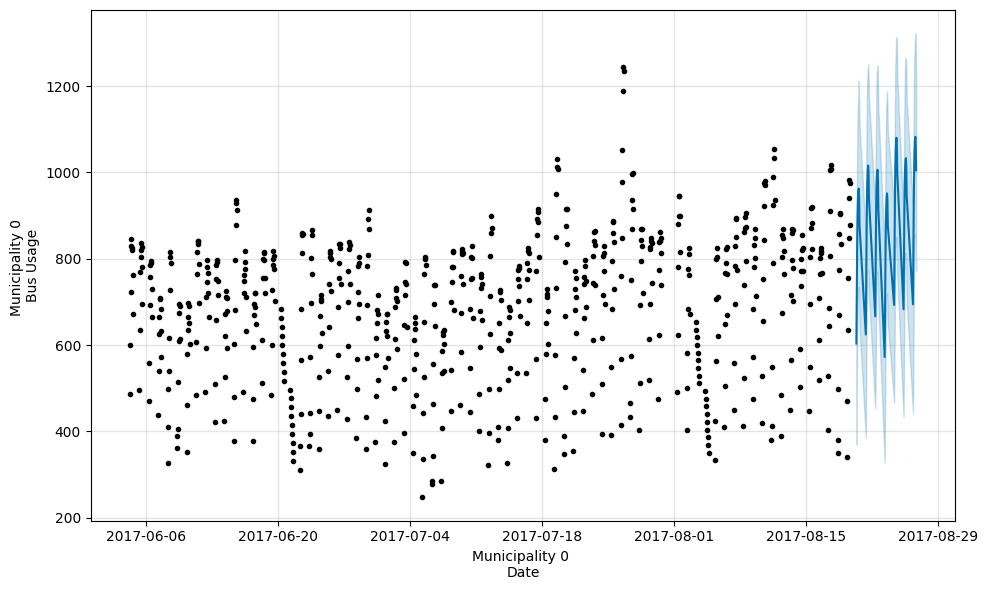

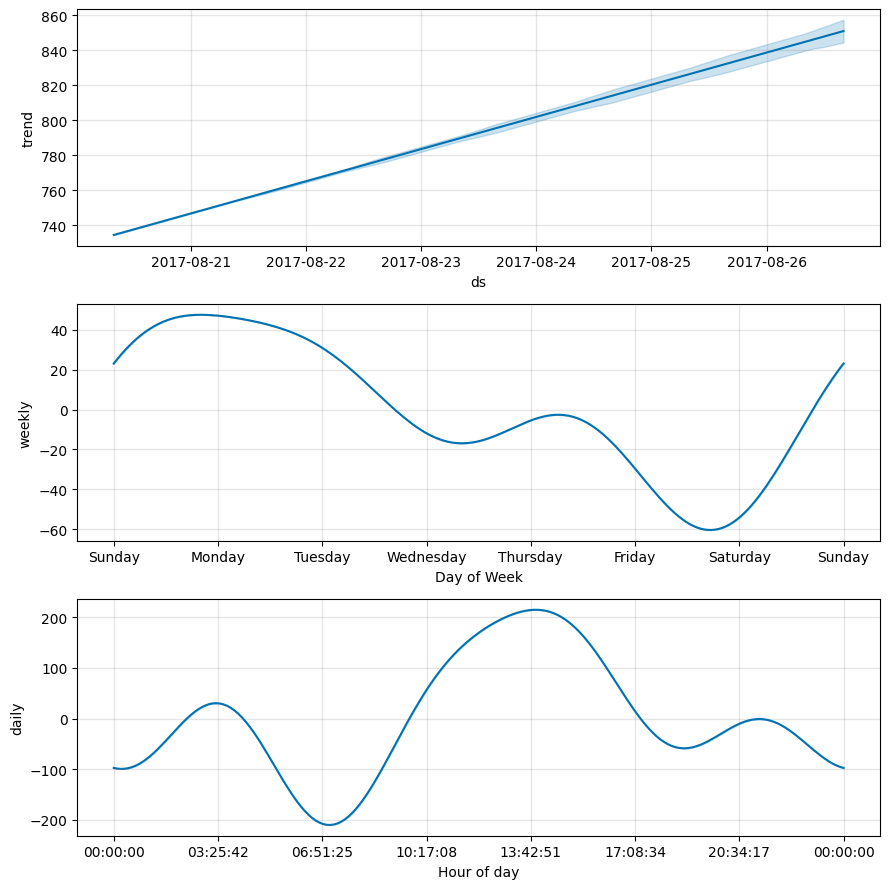

In [245]:
model.plot(visual_pred_0 , xlabel = 'Municipality 0 \nDate' , ylabel = 'Municipality 0 \nBus Usage' );
model.plot_components(visual_pred_0);

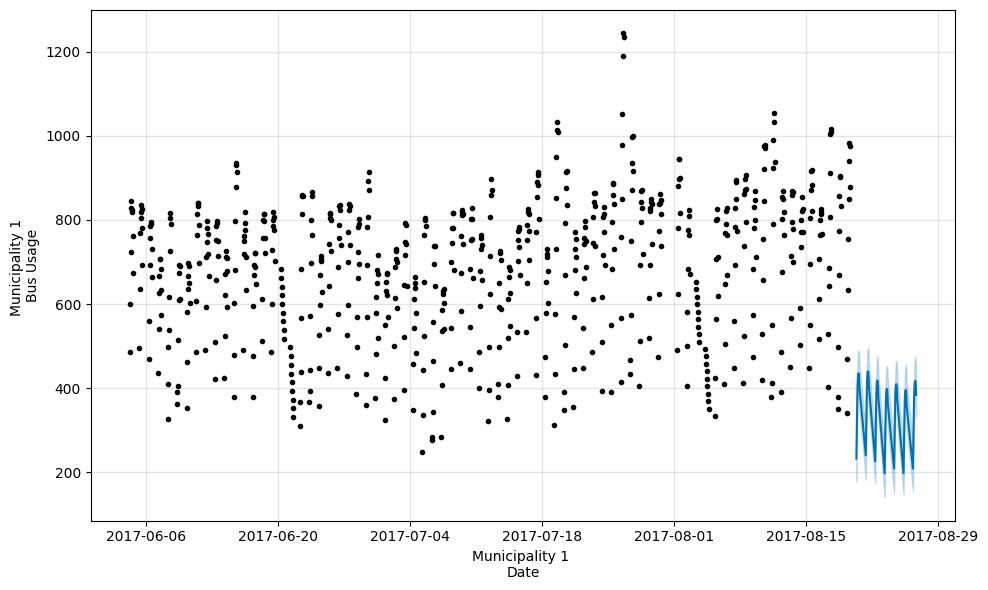

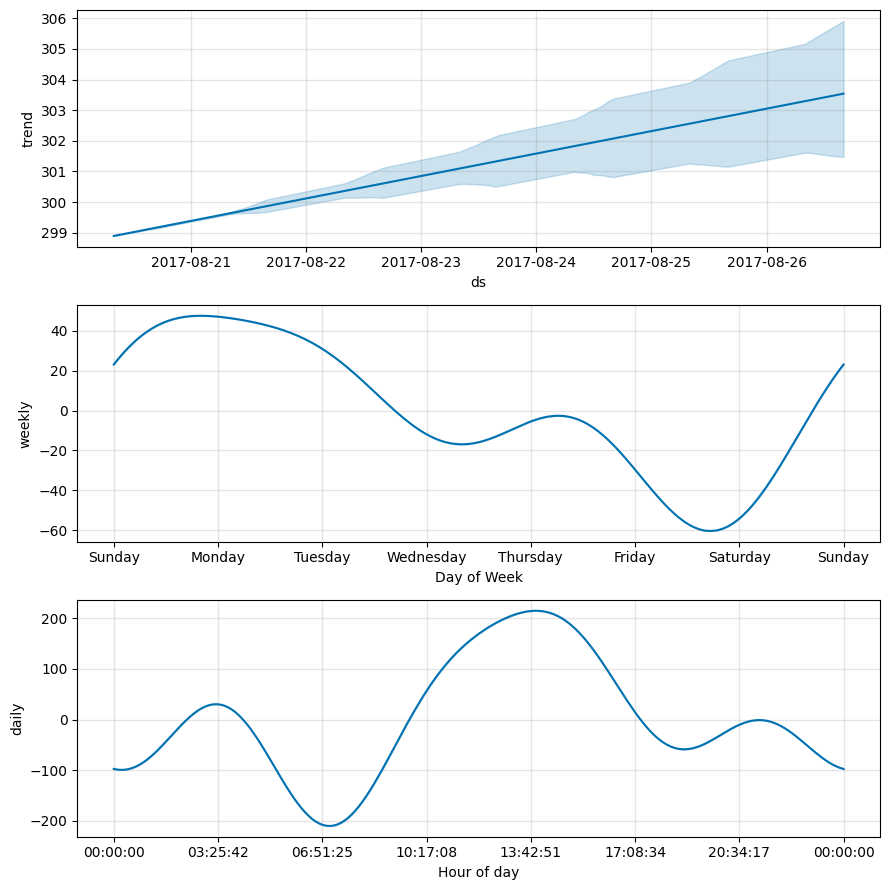

In [246]:
model.plot(visual_pred_1 , xlabel = 'Municipality 1 \nDate' , ylabel = 'Municipality 1 \nBus Usage' );
model.plot_components(visual_pred_1);

In [ ]:
# Not done but I'm done for now :)

# Problems I've found so far

In [ ]:
# 1) Either the total_capacity of the municipality with id number 1 was entered incorrectly or the usage information of 229 data was entered incorrectly.(
# 1.Option --> Since there is not a big difference, we can assume that a few buses are rented by that municipality. 
# 2.Option --> Or we can think that the buses are counted incorrectly and it will be impossible to exceed the total capacity, and we can equal the ones that exceed the capacity to the upper limit.)


# 2) The time of 2 data was entered incorrectly (Solved correct data entered)
# 3) dtype of timestap feature was object (Solved dtype changed)
# 4) There is quite a bit of data and measurements for 7 o'clock. There is so little data, probably because the buses starts just towards those hours. (Solved +5 minutes and 10 seconds added.)


# 5) While 180 measurements were required, 170 measurements were made at 5 days. (Counting was made 1 time, not 2 times, at the 8th hour of those who were 170) (180 or 170, it doesn't matter)

# 6) On 30 June, 340 measurements were made while it should have been 180. There are datas where 2 measurements are made at intervals of a few seconds. 
# (One of the measurements made at the same minute is deleted. Second measurements are kept)

# 7) We have 18 nan days to handle. (Total 162 hours)
